In [2]:
# Python library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as sm
from sklearn import metrics
from collections import Counter
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
%matplotlib inline


In [1]:
import pandas as pd
dfCSV = pd.read_csv("lodgingdata.csv")

     Age  Gender Residential    EmploymentStatus MaritalStatus  \
0     25  Female       Urban  Employed full-time        Single   
1     25  Female       Rural  Employed full-time        Single   
2     21  Female       Urban             Student        Single   
3     21    Male       Rural             Student        Single   
4     39    Male       Rural  Employed full-time       Married   
..   ...     ...         ...                 ...           ...   
495   63  Female       Rural  Employed full-time       Married   
496   50    Male       Urban  Employed full-time        Single   
497   47    Male       Rural  Employed full-time        Single   
498   69    Male       Urban             Retired       Married   
499   62    Male       Urban  Employed full-time       Married   

    HouseholdCategory OftenTravel TravellingFor  YearlyTravel  StayDuration  \
0                 M40          No    Businesses             3             4   
1                 M40          No       Holiday  

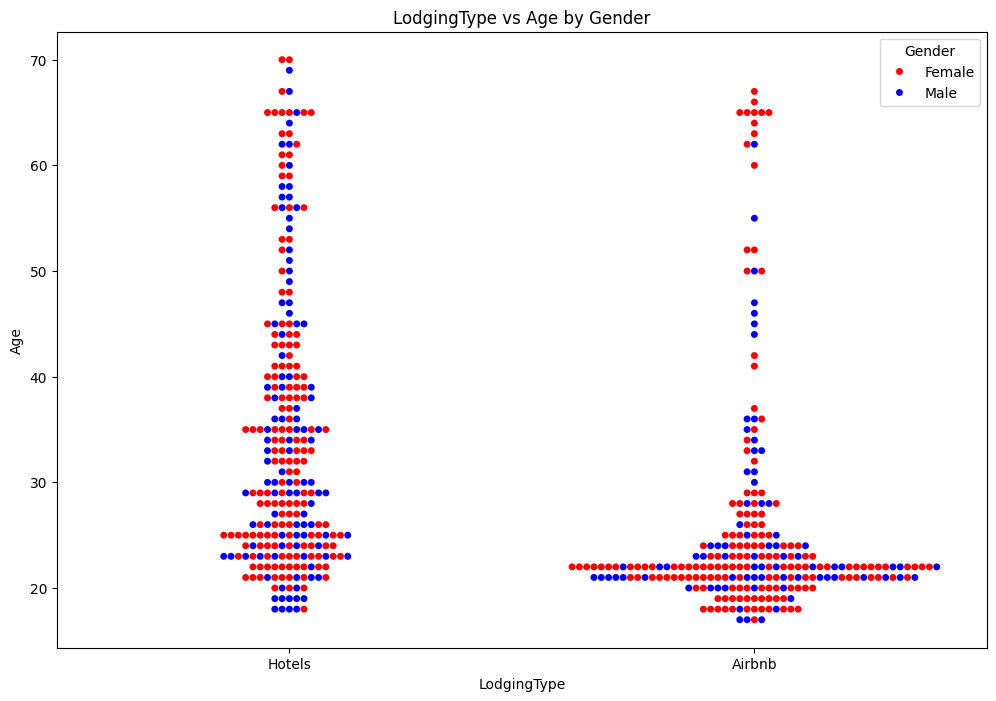

In [4]:
# 1. Categorical data -Nominal: LodgingType vs Age by Gender
# Info stat = Mode/total
# Visualization tool = Categorical Scatter Plot

# Categorical scatter plot with points colored by gender
plt.figure(figsize=(12, 8))
sns.swarmplot(x='LodgingType', y='Age', hue='Gender', data=dfCSV, palette={'Male': 'blue', 'Female': 'red'})
plt.title('LodgingType vs Age by Gender')
plt.xlabel('LodgingType')
plt.ylabel('Age')
plt.show()

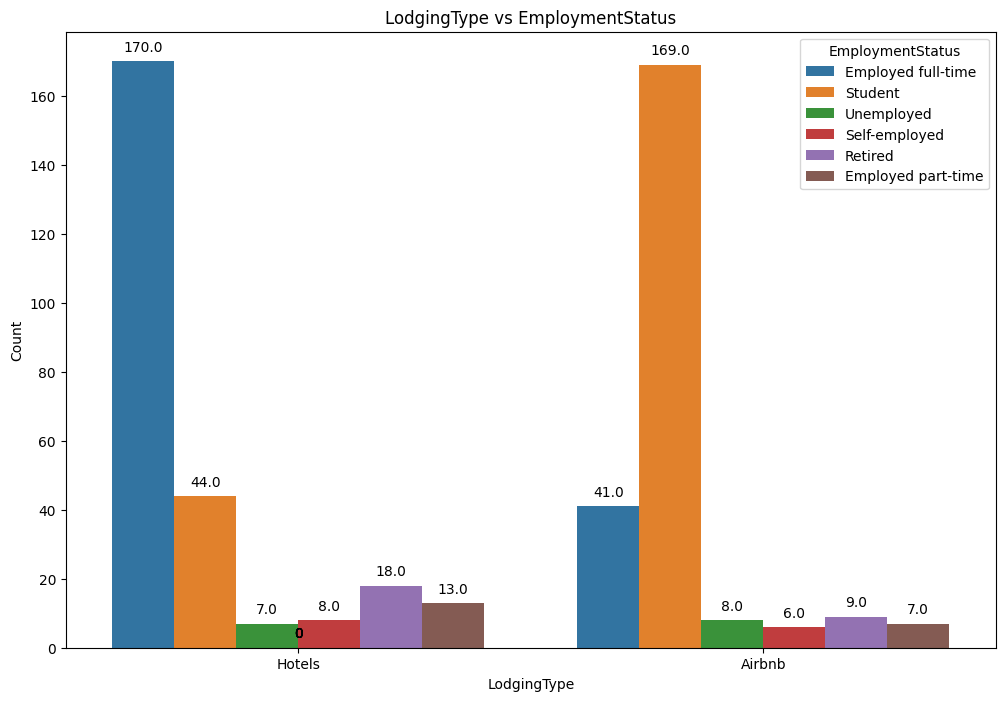

In [5]:
# 2. Categorical data -Nominal: LodgingType vs EmploymentStatus
# Info stat = Mode/total
# Visualization tool = Grouped bar chart

# Bar plot for LodgingType vs EmploymentStatus with total count annotations
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='LodgingType', hue='EmploymentStatus', data=dfCSV)

# Add total count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('LodgingType vs EmploymentStatus')
plt.xlabel('LodgingType')
plt.ylabel('Count')
plt.legend(title='EmploymentStatus', bbox_to_anchor=(1, 1))
plt.show()

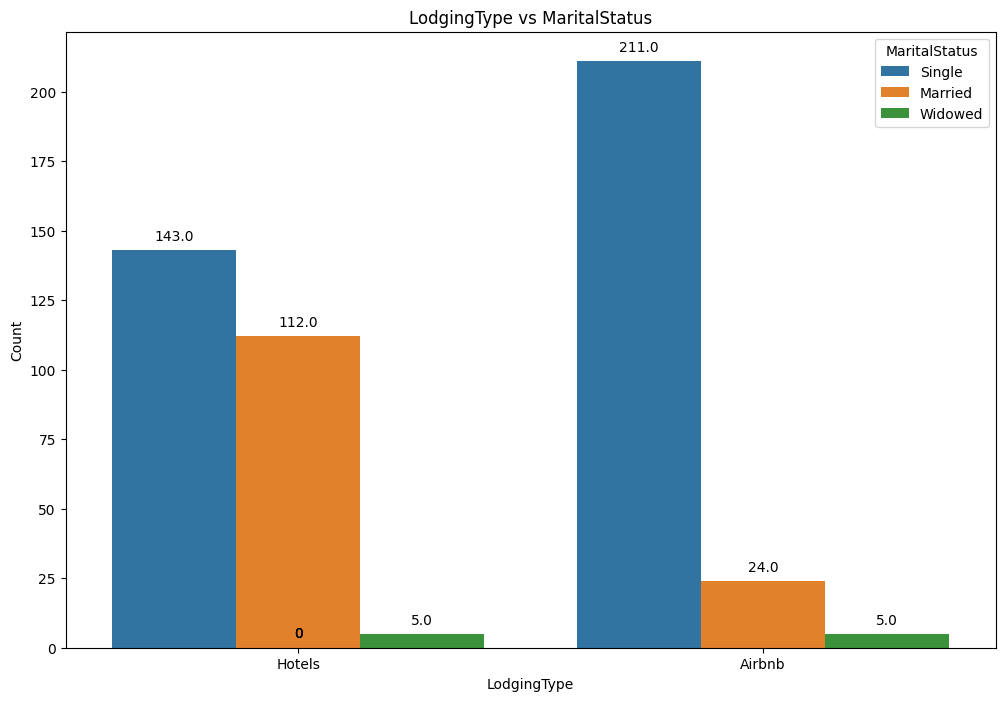

In [6]:
# 3. Categorical data -Nominal: LodgingType vs MaritalStatus
# Info stat = Mode/total
# Visualization tool = Grouped Bar Chart

# Crossbar plot for LodgingType vs MaritalStatus with total count annotations
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='LodgingType', hue='MaritalStatus', data=dfCSV, dodge=True)

# Add total count annotations on top of each bar for each group
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('LodgingType vs MaritalStatus')
plt.xlabel('LodgingType')
plt.ylabel('Count')
plt.legend(title='MaritalStatus', bbox_to_anchor=(1, 1))
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Asus\AppData\Local\Temp\ipykernel_25260\1952581187.py", line 15, in <module>
    plt.xlabel(wspace=0.5)
TypeError: xlabel() missing 1 required positional argument: 'xlabel'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 2120, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  

<Figure size 1500x1500 with 0 Axes>

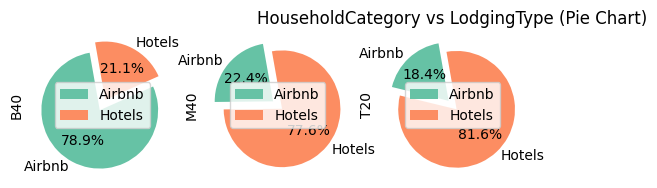

In [5]:
# 4. Categorical data -Nominal: HouseholdCategory vs LodgingType
# Info stat = Mode/total
# Visualization tool = Pie Chart

# Count the occurrences of each combination
count_data = pd.crosstab(dfCSV['HouseholdCategory'], dfCSV['LodgingType'])

# Plot a larger pie chart
plt.figure(figsize=(15, 15))
colors = plt.cm.Set2.colors  # Set a color palette
explode = (0.1, 0.1)  # Explode slices for emphasis

count_data.T.plot.pie(subplots=True, autopct='%1.1f%%', startangle=100, colors=colors, explode=explode)
plt.title('HouseholdCategory vs LodgingType (Pie Chart)')
plt.xlabel(wspace=0.5)
plt.ylabel('')
plt.show()

<Figure size 1200x800 with 0 Axes>

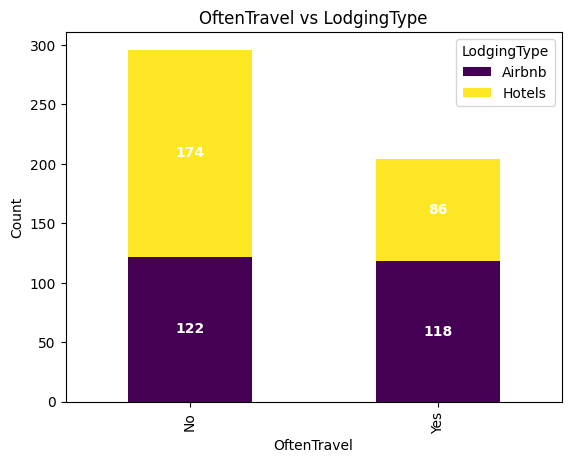

In [6]:
# 5. Categorical data -Nominal: OftenTravel vs LodgingType
# Info stat = Mode/total
# Visualization tool = Stacked Bar Chart

# Create a crosstab for OftenTravel vs LodgingType
cross_tab = pd.crosstab(dfCSV['OftenTravel'], dfCSV['LodgingType'])

# Stacked bar plot for OftenTravel vs LodgingType with counts
plt.figure(figsize=(12, 8))
ax = cross_tab.plot(kind='bar', stacked=True, colormap='viridis')

# Add count annotations on top of each bar
for i, patch in enumerate(ax.patches):
    height = patch.get_height()
    width = patch.get_width()
    x, y = patch.get_xy()
    
    # Display the count on top of each bar
    ax.text(x + width/2, y + height/2, f'{cross_tab.iloc[i % 2, i // 2]}', 
            ha='center', va='center', color='white', fontweight='bold')

plt.title('OftenTravel vs LodgingType')
plt.xlabel('OftenTravel')
plt.ylabel('Count')
plt.legend(title='LodgingType', bbox_to_anchor=(1, 1))
plt.show()

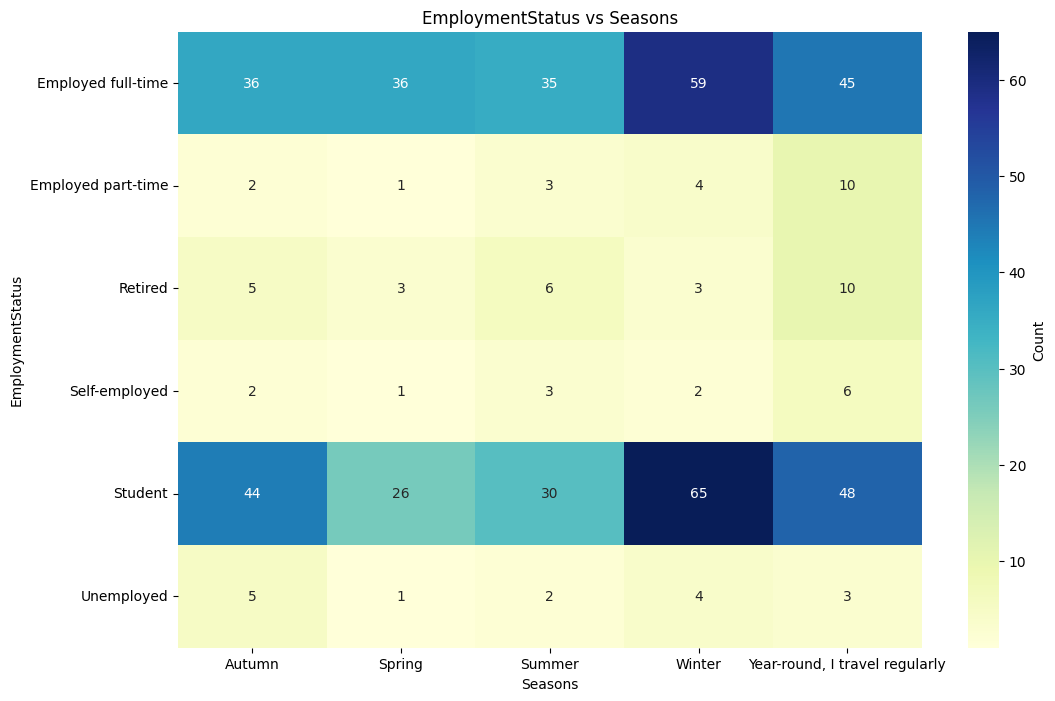

In [7]:
# 6. Categorical data -Nominal: EmploymentStatus vs Seasons
# Info stat = Mode/total
# Visualization tool = Crosstab Chart

# Create a crosstab for EmploymentStatus vs Seasons
cross_tab = pd.crosstab(dfCSV['EmploymentStatus'], dfCSV['Seasons'])

# Plot the crosstab chart using seaborn's heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d', cbar_kws={'label': 'Count'})
plt.title('EmploymentStatus vs Seasons')
plt.xlabel('Seasons')
plt.ylabel('EmploymentStatus')
plt.show()

<Figure size 2000x3000 with 0 Axes>

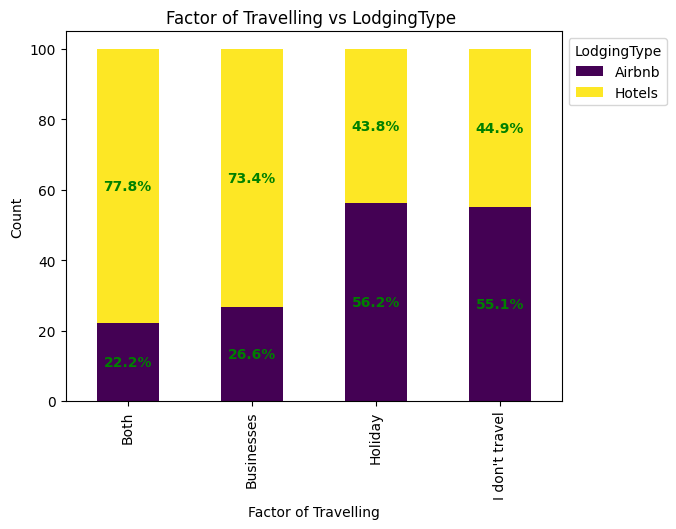

In [8]:
# 7. Categorical data -Nominal: Factor of Travelling vs LodgingType
# Info stat = Mode/total
# Visualization tool = Stacked Bar Chart


# Create a crosstab for TravellingFactor vs LodgingType
cross_tab = pd.crosstab(dfCSV['TravellingFor'], dfCSV['LodgingType'])

# Calculate percentages along each row
cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Stacked bar plot for ChoiceFactor vs LodgingType with percentages
plt.figure(figsize=(20, 30))
ax = cross_tab_percentage.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Factor of Travelling vs LodgingType ')
plt.xlabel('Factor of Travelling')
plt.ylabel('Count')
plt.legend(title='LodgingType', bbox_to_anchor=(1, 1))

# Add percentages on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center',
               color='green',fontweight='bold')

plt.show()


In [9]:
data = dfCSV['LodgingLocation'].value_counts(ascending=True)
print(data)

LodgingLocation
Beachfront      106
Countryside     115
Nature          139
City Centers    140
Name: count, dtype: int64


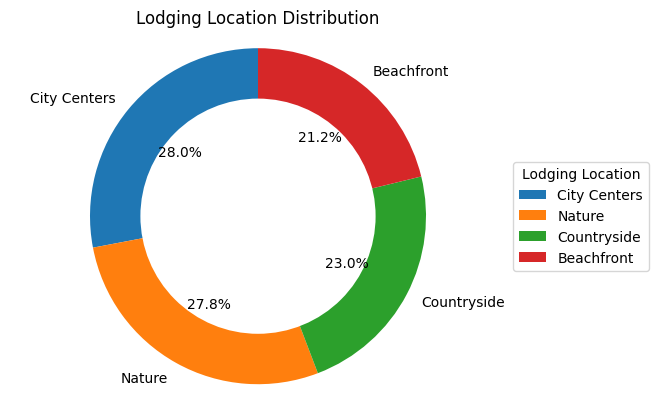

In [10]:
# 8. Categorical data -Nominal: LodgingLocation 
# Info stat = Mode/total
# Visualization tool = Donut Chart


# Group by LodgingLocation and count occurrences
location_counts = dfCSV['LodgingLocation'].value_counts()
fig, ax = plt.subplots()
# Plot the donut chart
ax.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
# Draw a circle in the center to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')
# Add a legend
ax.legend(location_counts.index, title="Lodging Location", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Lodging Location Distribution")
plt.show()

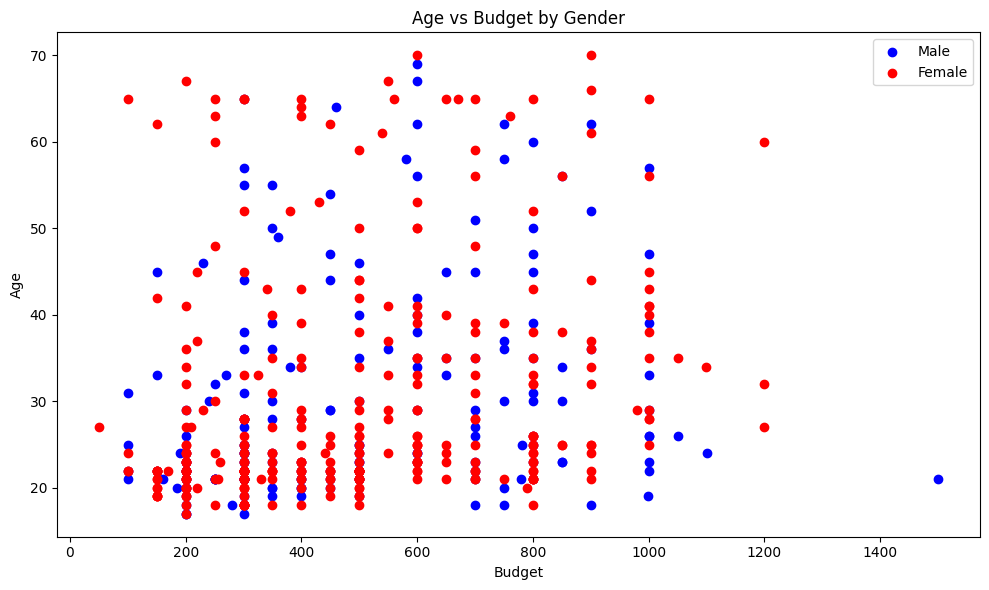

In [11]:
# 1. Numerical data -Norminal: Age vs Budget by Gender
# Info stat = Mode/total
# Visualization tool = Scatter Plot

# Separate data based on gender
male_data = dfCSV[dfCSV['Gender'] == 'Male']
female_data = dfCSV[dfCSV['Gender'] == 'Female']

# Scatter plot for Age vs LodgingBudget with different colors for gender
plt.figure(figsize=(10, 6))
plt.scatter(male_data['LodgingBudget'], male_data['Age'], color='blue', label='Male')
plt.scatter(female_data['LodgingBudget'], female_data['Age'], color='red', label='Female')

plt.title("Age vs Budget by Gender")
plt.xlabel('Budget')
plt.ylabel('Age')
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.show()

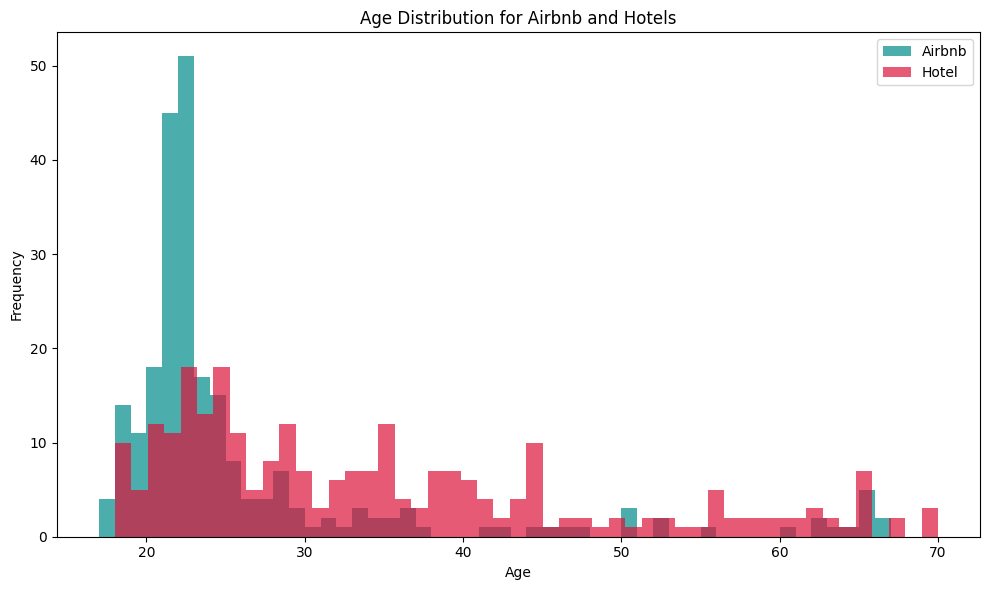

In [12]:
# 2. Numerical data -Nominal: Age Distribution by LodgingType
# Info stat = Mode/total
# Visualization tool = Histogram

# Separate data based on LodgingType
airbnb_data = dfCSV[dfCSV['LodgingType'] == 'Airbnb']
hotels_data = dfCSV[dfCSV['LodgingType'] == 'Hotels']

# Histogram for Age distribution with different colors for LodgingType
plt.figure(figsize=(10, 6))
plt.hist(airbnb_data['Age'], bins=50, color='darkcyan', label='Airbnb', alpha=0.7)
plt.hist(hotels_data['Age'], bins=50, color='crimson', label='Hotel', alpha=0.7)

plt.title("Age Distribution for Airbnb and Hotels")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.show()


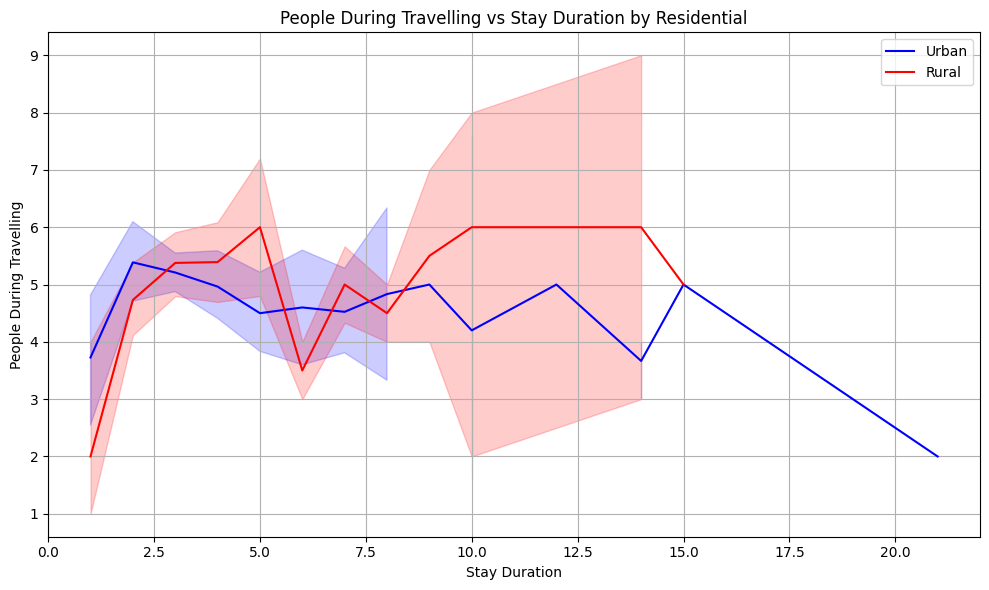

In [13]:
# 3. Numerical data -Nominal: People During Travelling vs Stay Duration by Residential
# Info stat = Mode/total
# Visualization tool = Line Chart

# Separate data based on residential status
Urban_data = dfCSV[dfCSV['Residential'] == 'Urban']
Rural_data = dfCSV[dfCSV['Residential'] == 'Rural']

# Line plot for People During Travelling vs Stay Duration with different lines for residential status
plt.figure(figsize=(10, 6))
sns.lineplot(x='StayDuration', y='PeopleDuringTravel', hue='Residential', data=dfCSV, palette={'Urban': 'blue', 'Rural': 'red'})

plt.title("People During Travelling vs Stay Duration by Residential")
plt.xlabel('Stay Duration')
plt.ylabel('People During Travelling')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


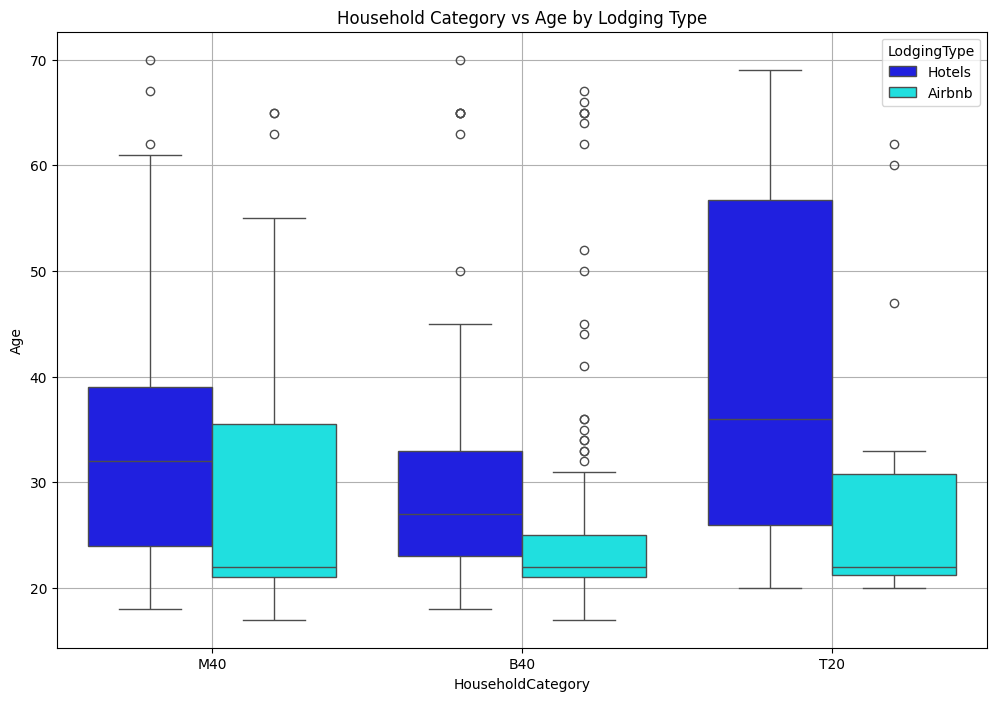

In [14]:
# 4. Numerical data -Nominal: Household Category vs Age by Lodging Type
# Info stat = Mode/total
# Visualization tool = Boxplot

# Boxplot to illustrate LodgingType and Age by HouseholdCategory
plt.figure(figsize=(12, 8))
sns.boxplot(x='HouseholdCategory', y='Age', hue='LodgingType', data=dfCSV, palette={'Hotels': 'blue', 'Airbnb': 'cyan'})
plt.title('Household Category vs Age by Lodging Type')
plt.xlabel('HouseholdCategory')
plt.ylabel('Age')
plt.legend(title='LodgingType')
plt.grid(True)
plt.show()

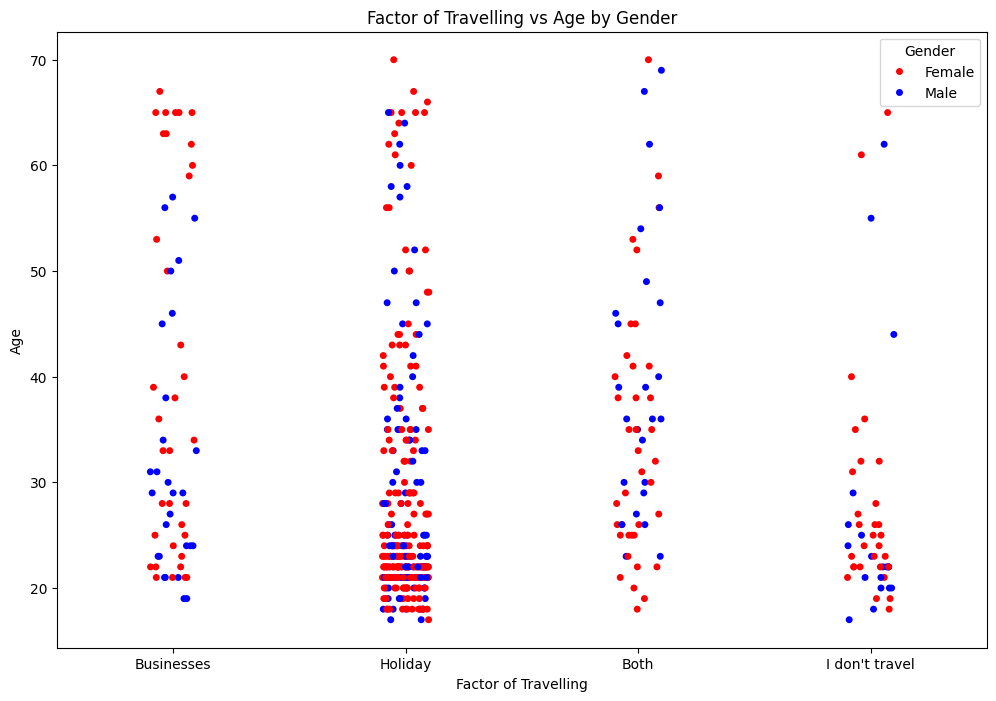

In [15]:
# 5. Numerical data -Nominal: Factor of Travelling vs Age by Gender
# Info stat = Mode/total
# Visualization tool = Group Strip Plot

# Categorical strip plot with points colored by gender
plt.figure(figsize=(12, 8))
sns.stripplot(x='TravellingFor', y='Age', hue='Gender', data=dfCSV, palette={'Male': 'blue', 'Female': 'red'})
plt.title('Factor of Travelling vs Age by Gender')
plt.xlabel('Factor of Travelling')
plt.ylabel('Age')
plt.show()

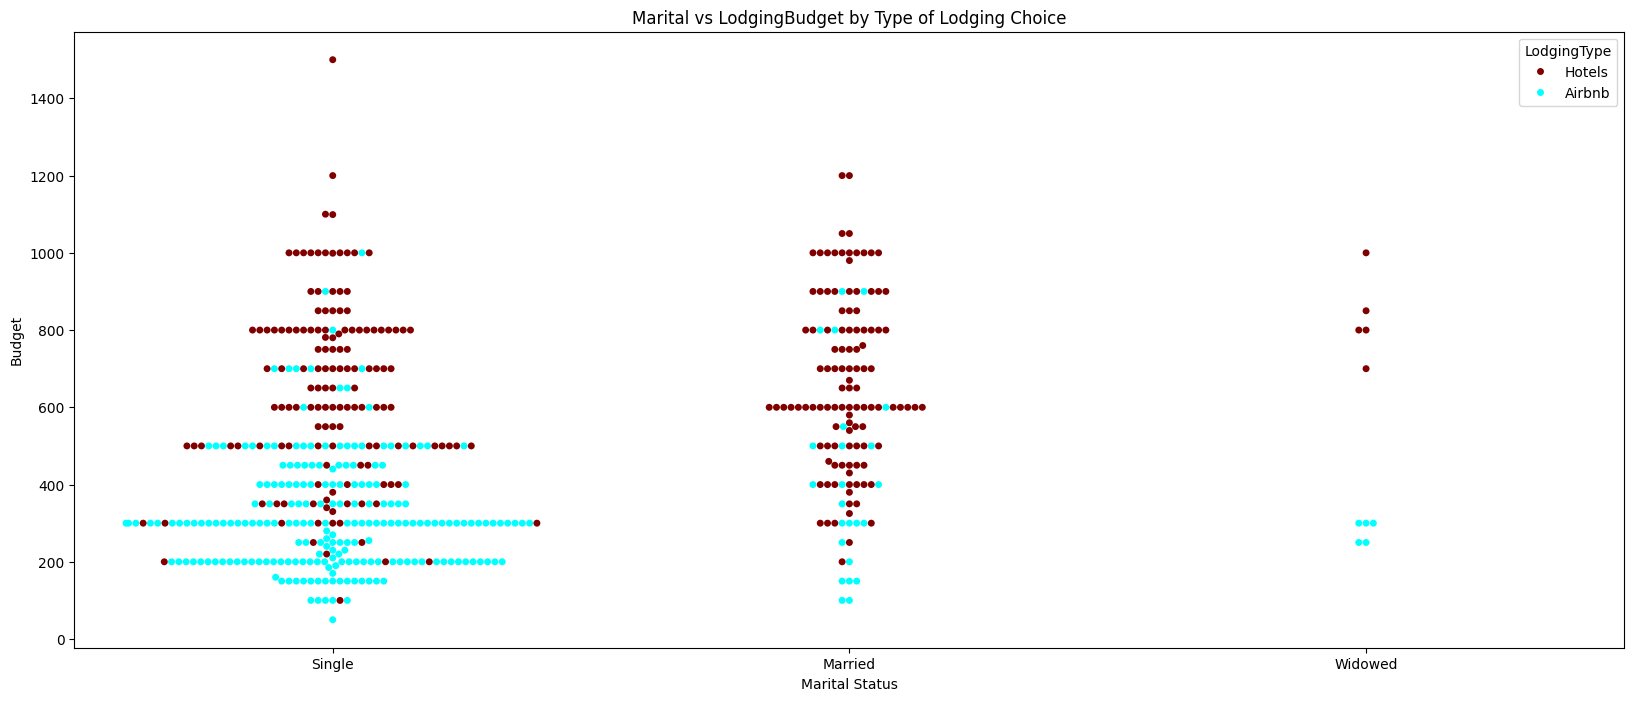

In [16]:
# 6. Numerical data -Nominal: Marital vs Lodging Budget by LodgingType
# Info stat = Mode/total
# Visualization tool = Group Swarm Plot

# Swarm plot with points colored by gender
plt.figure(figsize=(20, 8))
sns.swarmplot(x='MaritalStatus', y='LodgingBudget', hue='LodgingType', data=dfCSV, palette={'Hotels': 'maroon', 'Airbnb': 'cyan'})
plt.title('Marital vs LodgingBudget by Type of Lodging Choice')
plt.xlabel('Marital Status')
plt.ylabel('Budget')
plt.show()

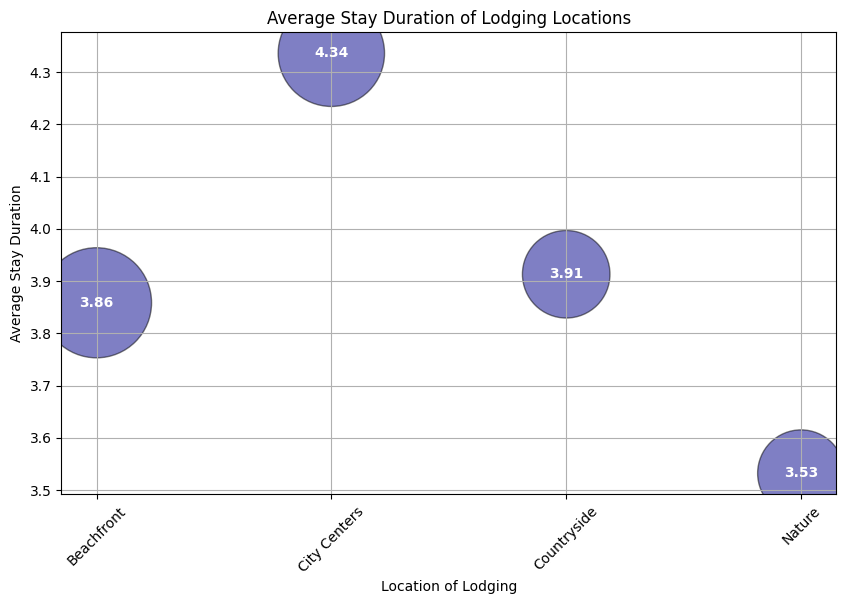

In [17]:
# 7. Numerical data -Nominal: Average Stay duration Distribution of Lodging Location
# Info stat = Mode/total
# Visualization tool = Bubble chart

# For the Bubble Chart, we need to calculate average budget and stay duration for each location
lodging_grouped = dfCSV.groupby('LodgingLocation').agg({'LodgingBudget': 'mean', 'StayDuration': 'mean'})

# Bubble Chart
plt.figure(figsize=(10, 6))

# Scatter plot 
scatter = plt.scatter(lodging_grouped.index, lodging_grouped['StayDuration'],
                      s=lodging_grouped['LodgingBudget']*10, alpha=0.5, color='darkblue', edgecolors='black')

# Add text annotations for averages on each bubble
for i, txt in enumerate(lodging_grouped.index):
    plt.annotate(f'{lodging_grouped["StayDuration"].iloc[i]:.2f}', (txt, lodging_grouped['StayDuration'].iloc[i]),
                 ha='center', va='center', color='white', fontweight='bold')

plt.title('Average Stay Duration of Lodging Locations')
plt.xlabel('Location of Lodging')
plt.ylabel('Average Stay Duration')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

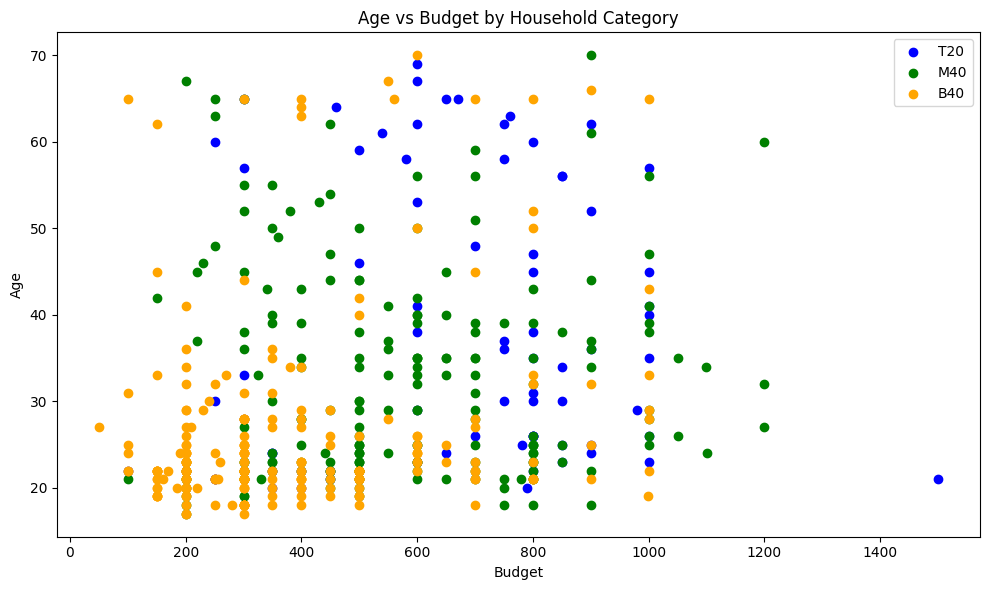

In [18]:
# 8. Numerical data -Nominal: Age vs Budget by Household Category
# Info stat = Mode/total
# Visualization tool = Scatter Plot

# Separate data based on gender
T20_data = dfCSV[dfCSV['HouseholdCategory'] == 'T20']
M40_data = dfCSV[dfCSV['HouseholdCategory'] == 'M40']
B40_data = dfCSV[dfCSV['HouseholdCategory'] == 'B40']

# Scatter plot for Age vs LodgingBudget with different colors for gender
plt.figure(figsize=(10, 6))
plt.scatter(T20_data['LodgingBudget'], T20_data['Age'], color='blue', label='T20')
plt.scatter(M40_data['LodgingBudget'], M40_data['Age'], color='green', label='M40')
plt.scatter(B40_data['LodgingBudget'], B40_data['Age'], color='orange', label='B40')

plt.title("Age vs Budget by Household Category")
plt.xlabel('Budget')
plt.ylabel('Age')
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.show()

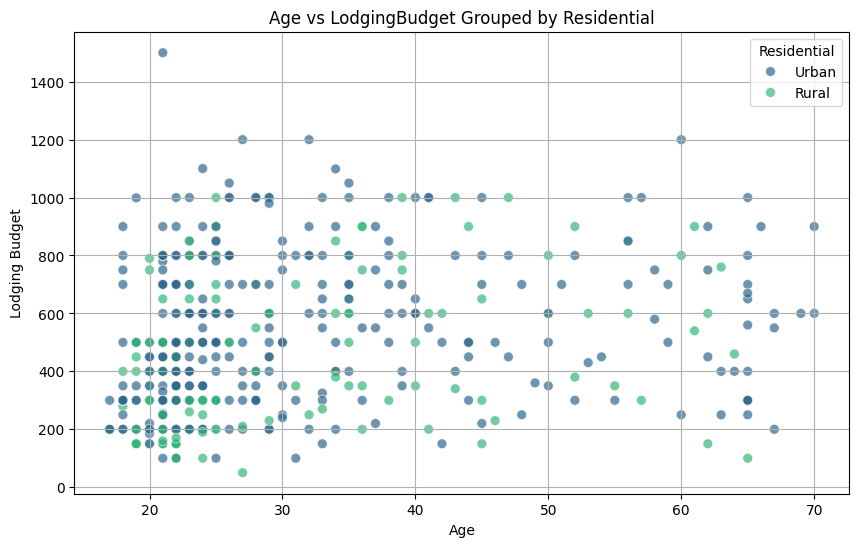

In [44]:
# 9. Numerical data -Nominal: 
# Info stat =
# Visualization tool =

# Scatter plot Age vs Lodging Budget grouped by residential
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfCSV, x='Age', y='LodgingBudget', hue='Residential', palette='viridis', alpha=0.7, s=50)
plt.title('Age vs LodgingBudget Grouped by Residential')
plt.xlabel('Age')
plt.ylabel('Lodging Budget')
plt.legend(title='Residential', loc='upper right')
plt.grid(True)
plt.show()